<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Miscellaneous/Longer_Term_Crypto_Degrees_of_Freedom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

14:58:15 Starting...
14:58:15 Installing yfinance into Google notebook...
14:58:20 Installing arch into Google notebook...
14:58:32 Initialized.


In [2]:
try:
    from google.colab import drive
    nprint("Mounting Google drive...")
    drive.mount("/content/drive")

except:
    raise

14:58:32 Mounting Google drive...
Mounted at /content/drive


In [3]:
data=pd.read_table('https://s3.amazonaws.com/public.gillerinvestments.com/crypto_returns.txt',header=[0, 1],skiprows=[2],sep='\\s+',engine='python',parse_dates=True)
data.columns=data.columns.droplevel(1)
data.index=pd.DatetimeIndex(data.index).to_period('D')
data.index.name='UTC Date'
data.columns.name='Return (%)'
data=data[sorted(data.columns)].copy()
data.drop(data.index[-1],inplace=True) # remove the final row in case it is not complete
data.drop(data.index[data.index<(fd:='2024-07-31')],inplace=True) # remove data before 2024-07-31
data=data[data.columns[data.apply(lambda x:x.first_valid_index())<=fd]] # remove newly added tickers after 2024-07-31
display(data)

Return (%),AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,COMP-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,SHIB-USD,UNI-USD,XLM-USD,XTZ-USD
UTC Date,,,,,,,,,,,,,,
2024-07-31,2.001567,-2.358840,-4.200110,-2.365537,-0.047707,-2.837462,-2.073961,-1.452662,-2.375695,-2.164731,-6.382353,-3.024153,-1.936113,-2.775783
2024-08-01,8.726297,0.036957,-0.288448,1.151609,1.518046,-2.302137,-0.996922,-0.871557,0.491381,-0.799247,-0.816839,0.230222,-1.248259,-0.608589
2024-08-02,-5.610969,-8.265604,-7.564218,-6.025579,-4.053610,-6.341034,-6.167053,-6.727354,-7.544241,-6.546150,-7.190371,-8.025336,-3.852546,-5.256278
2024-08-03,-4.481945,-3.931834,-4.592054,-1.198185,-13.779336,-3.094934,-2.771871,-2.837828,-1.918234,-0.578258,-2.866894,0.234600,-2.236539,-0.486530
2024-08-04,-7.831497,-6.321154,-8.886479,-4.229510,-7.939911,-4.046256,-3.804583,-7.507444,-6.932854,-3.440406,-6.289529,-7.255568,-5.467211,-3.531816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-05,-2.807387,1.037969,-1.730138,0.083694,0.365571,-3.309430,-0.858425,-0.608400,-0.048036,3.830317,-1.725555,-0.784762,-2.219434,1.997894
2025-01-06,0.002865,2.407511,2.642061,4.041451,0.123313,1.578752,1.998411,1.519403,1.198289,-1.202622,0.627090,-0.415745,1.264613,0.291898
2025-01-07,-10.103950,-11.027984,-9.426557,-5.253054,-11.468977,-10.228987,-9.557590,-8.377718,-10.339428,-9.856345,-9.451600,-10.287939,-6.398592,-9.759653


Return (%),AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,COMP-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,SHIB-USD,UNI-USD,XLM-USD,XTZ-USD
Return (%),,,,,,,,,,,,,,
AAVE-USD,1.000000,0.633850,0.540514,0.468141,0.626620,0.354060,0.652310,0.667061,0.668796,0.420976,0.423407,0.695164,0.188227,0.394865
AVAX-USD,0.633850,1.000000,0.683269,0.688323,0.756592,0.627452,0.751501,0.718600,0.827361,0.627036,0.651697,0.648879,0.360855,0.528675
BCH-USD,0.540514,0.683269,1.000000,0.778358,0.562550,0.677418,0.798664,0.798770,0.619223,0.630077,0.663781,0.705811,0.379062,0.587475
BTC-USD,0.468141,0.688323,0.778358,1.000000,0.524203,0.762518,0.675992,0.807165,0.568883,0.551699,0.675070,0.614927,0.249720,0.463728
COMP-USD,0.626620,0.756592,0.562550,0.524203,1.000000,0.488606,0.741004,0.648589,0.684525,0.526927,0.590124,0.604256,0.330115,0.517303
DOGE-USD,0.354060,0.627452,0.677418,0.762518,0.488606,1.000000,0.592677,0.640215,0.466181,0.493108,0.787795,0.506811,0.319336,0.414050
ETC-USD,0.652310,0.751501,0.798664,0.675992,0.741004,0.592677,1.000000,0.830033,0.692157,0.695708,0.691039,0.780933,0.504146,0.601090
ETH-USD,0.667061,0.718600,0.798770,0.807165,0.648589,0.640215,0.830033,1.000000,0.665761,0.592785,0.647254,0.740616,0.278765,0.530950
LINK-USD,0.668796,0.827361,0.619223,0.568883,0.684525,0.466181,0.692157,0.665761,1.000000,0.615357,0.477481,0.675936,0.352357,0.542969


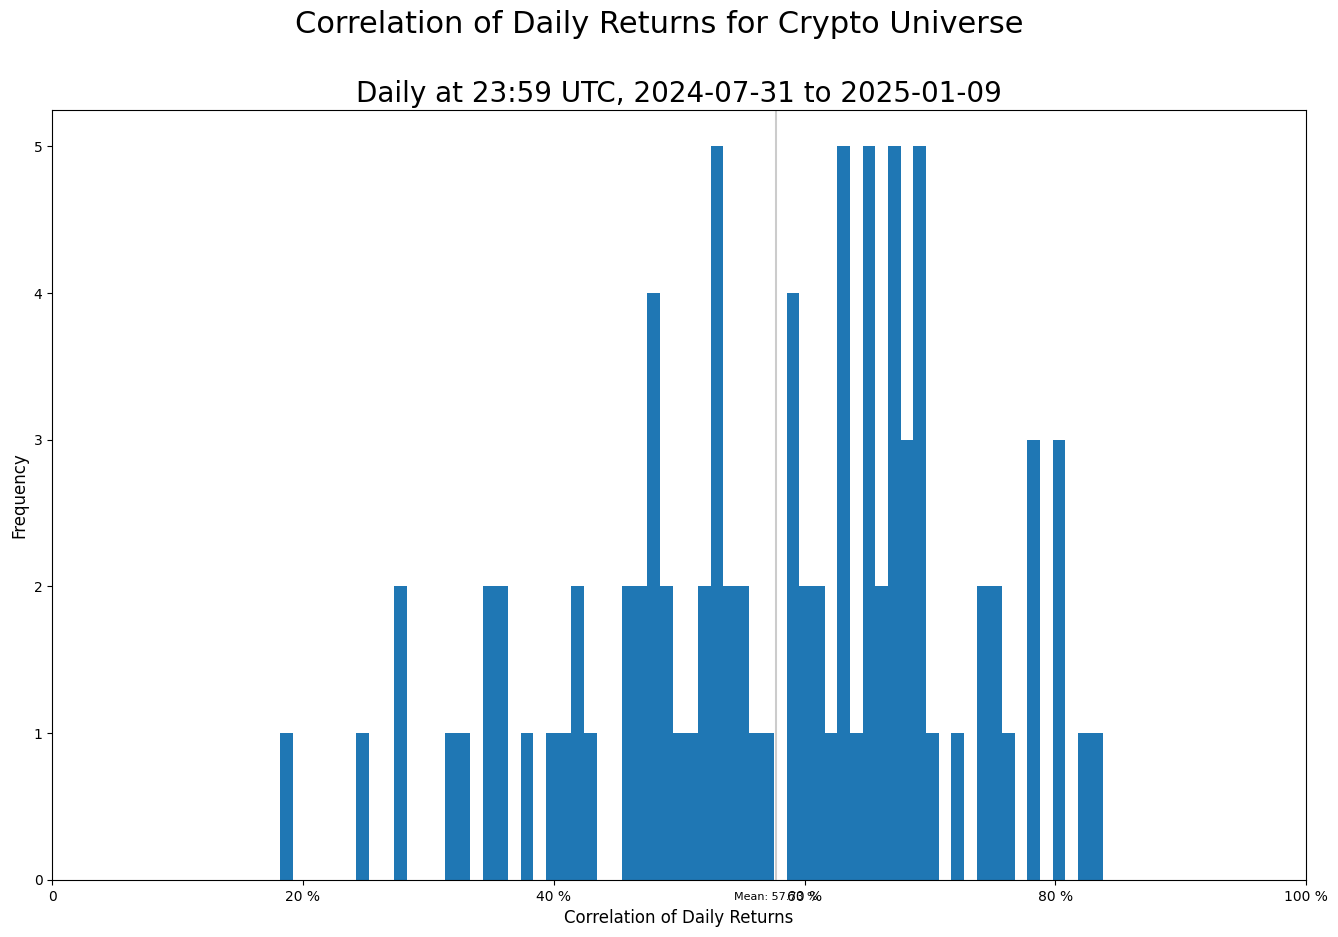

In [4]:
display(rho:=data.corr())
samples=pd.DataFrame({"row":[],"column":[],"correlation":[]}).set_index(["row","column"])

for i in range(rho.shape[0]):
    for j in range(i+1,rho.shape[0]):
        samples.loc[(rho.index[i],rho.columns[j]),"correlation"]=rho.iloc[i,j]*hundred

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
counts,bins,patches=plot.hist(samples['correlation'],bins=np.linspace(zero,hundred,100))
plot.set_xlabel("Correlation of Daily Returns",fontsize=12)
plot.xaxis.set_major_formatter(PercentLabels(0))
plot.set_ylabel("Frequency",fontsize=12)
plot.yaxis.set_major_formatter(CountLabels(0))
plot.set_title(subtitle:="Daily at 23:59 UTC, %s to %s" % (data.index[0],data.index[-1]),fontsize=20)
plot.set_xlim(zero,hundred)
plot.axvline(m:=samples['correlation'].mean(),color='black',alpha=0.2)
plot.text(m,zero,"\nMean: {:.2f} %".format(m),ha='center',va='top',fontsize=8)
figure.suptitle(title:="Correlation of Daily Returns for Crypto Universe",fontsize=22)
figure.savefig((filepath:='/content/drive/MyDrive/')+title+(filetype:='.pdf'),dpi=300,bbox_inches='tight')

In [5]:
if 'random_seed' not in locals():
    random_seed=12345678 # don't reset the seed multiple times in one session

if random_seed is not None:
    generator=np.random.default_rng(seed=random_seed)
    nprint("Using NumPy random seed %d." % random_seed)
    random_seed=None

else:
    nprint("Continuing random sequence from prior seed.")

14:58:59 Using NumPy random seed 12345678.


In [6]:
results=pd.DataFrame({"Sample":range(1,(n:=1000)+1),"Assets":[np.nan]*n,"Portfolio":[np.nan]*n,"Coins":[""]*n}).set_index("Sample") # n is number of trials
nprint("Beginning analysis for {:,d} trials.".format(n))

for i in tqdm(results.index): # for each trial, pick a random sample of stocks with portfolio sizes uniformly distributed between 1 and maximum, one of 2^503-1 choices
    returns=pd.DataFrame()

    for ticker in data[generator.choice(data.columns,generator.integers(1,data.shape[1]+1),replace=False)]:
        returns[ticker]=data[ticker]
        returns=returns.copy() # 'cos it frags, apparently

    results.loc[i,"Coins"]=",".join(sorted(map(lambda x:x.split('-')[0],returns.columns))) # list of coins in portfolio
    returns['Portfolio']=returns.mean(axis=1) # equal weighted portfolio return
    select=returns["Portfolio"]>zero if filter=="Up" else returns["Portfolio"]<zero if filter=="Down" else ~returns["Portfolio"].isna()
    results.loc[i,"Assets"]=returns.shape[1]-1 # number of assets we ended up with
    results.loc[i,"Independent"]=returns.loc[select,[a for a in returns if a!="Portfolio"]].var().sum()/results.loc[i,"Assets"]**2 # if no correlation, portfolio variance is total variance divided by square of number of assets
    results.loc[i,"Portfolio"]=returns.loc[select,'Portfolio'].var() # variance of portfolio returns for same period as individual returns

results.dropna(inplace=True)
results.drop_duplicates(inplace=True)
results["Effective D.o.F."]=results["Independent"]/results["Portfolio"]*results["Assets"]
display(results)
nprint("Done.")

14:58:59 Beginning analysis for 1,000 trials.


  0%|          | 0/1000 [00:00<?, ?it/s]

,Assets,Portfolio,Coins,Independent,Effective D.o.F.
Sample,,,,,
1,14.0,15.363810,"AAVE,AVAX,BCH,BTC,COMP,DOGE,ETC,ETH,LINK,LTC,S...",1.985380,1.809142
2,9.0,15.237806,"AAVE,AVAX,BTC,ETH,LINK,LTC,SHIB,UNI,XLM",3.129498,1.848395
3,8.0,16.709071,"COMP,DOGE,ETH,LTC,SHIB,UNI,XLM,XTZ",3.941721,1.887224
4,7.0,15.950316,"BCH,ETH,LINK,LTC,SHIB,UNI,XTZ",3.665964,1.608855
5,10.0,15.453846,"AAVE,AVAX,BCH,BTC,COMP,DOGE,ETH,SHIB,UNI,XLM",2.826226,1.828818
...,...,...,...,...,...
996,7.0,19.852459,"AAVE,AVAX,COMP,DOGE,LINK,SHIB,XTZ",4.569901,1.611353
997,12.0,15.083810,"AAVE,BCH,BTC,COMP,DOGE,ETC,ETH,LINK,LTC,SHIB,U...",2.108258,1.677235
998,8.0,14.868432,"BCH,BTC,ETC,LTC,SHIB,UNI,XLM,XTZ",3.415065,1.837485


14:59:12 Done.


In [7]:
from statsmodels.api import OLS,add_constant
Nmin,Nmax=five,results["Assets"].max()-one
design=results[select:=(results["Assets"]>=Nmin)&(results["Assets"]<=Nmax)][[yn:="Effective D.o.F.",xn:="Assets"]].drop_duplicates()
model=OLS(design[yn],add_constant(design[xn])).fit()
nprint(model.summary())
nprint("Implied regression factor count: {:.2f} +/- {:.2g} for data in [{:,.0f},{:,.0f}].".format(Kreg:=one/model.params.iloc[1],model.bse.iloc[1]/model.params.iloc[1]**4,Nmin,Nmax))
final=results[results[xn]==results[xn].max()].drop_duplicates(xn)
Nstar,Nact=tuple(final.iloc[-1][[yn,xn]])
rho=(Nact-Nstar)/((Nact-one)*Nstar)
nprint("Effective D.o.F. Limit {:,.2f}, Implied Correlation {:.2f} %.".format(Nstar,rho*hundred))
Khat=Nact/Nstar
nprint("Implied limiting factor count: {:.0f}.".format(Khat))

14:59:14                             OLS Regression Results                            
Dep. Variable:       Effective D.o.F.   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     67.10
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           1.60e-15
Time:                        14:59:14   Log-Likelihood:                 336.91
No. Observations:                 593   AIC:                            -669.8
Df Residuals:                     591   BIC:                            -661.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5726      0.020     78.121

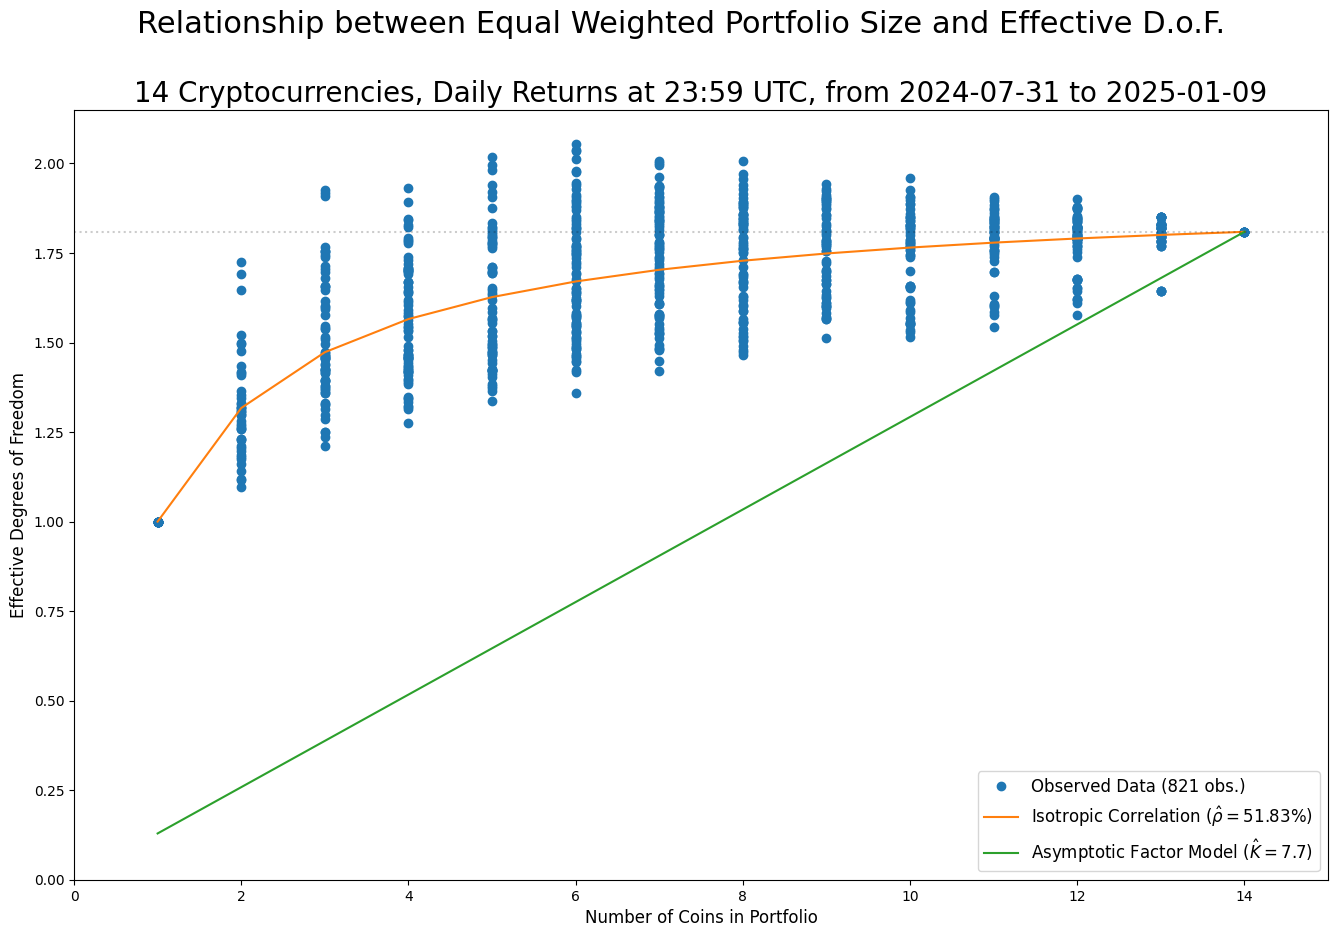

In [8]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(x:=results["Assets"].to_numpy(),y:=results["Effective D.o.F."].to_numpy(),'o',label='Observed Data (%d obs.)' % results.shape[0])
plot.plot(xp:=np.unique(np.sort(x)),xp/(one+(xp-one)*rho),'-',label='Isotropic Correlation ($\\hat{\\rho} = %.2f$%%)' % (rho*hundred))
plot.plot(xp,xp/Khat,'-',label="Asymptotic Factor Model ($\\hat{K} = %.1f$)" % Khat)
#plot.plot(xpp:=np.arange(Nmin,Nmax+one),model.params.iloc[0]+model.params.iloc[1]*xpp,'-',label="Regression Linear Model ($\\hat{K} = %.1f$)" % Kreg)
plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_ylim(zero,None)
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title:="Relationship between Equal Weighted Portfolio Size and Effective D.o.F.",fontsize=22)
plot.set_title(subtitle:="%d Cryptocurrencies, Daily Returns at 23:59 UTC, from %s to %s" % (data.shape[1],data.index[0],data.index[-1]),fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(filepath+title+filetype,dpi=300,bbox_inches='tight')

14:59:16 Isotropic Model: Total Chi Squared 11.2807 for 12 d.o.f., p Value = 0.505025.
14:59:16 Factor Model: Total Chi Squared 17.1436 for 7 d.o.f., p Value = 0.0164935.


Mean   St.Dev. Sample  Std.Err. Isotropic                      \
                                                Model     Error   Z Score   
Assets                                                                      
1.0     1.000000  0.000000     14  0.000000  1.000000  0.000000       NaN   
2.0     1.318208  0.145448     44  0.021927  1.317224  0.000984  0.044878   
3.0     1.504400  0.170972     67  0.020888  1.472979  0.031421  1.504277   
4.0     1.559657  0.159187     79  0.017910  1.565538 -0.005881 -0.328346   
5.0     1.620891  0.180244     71  0.021391  1.626875 -0.005984 -0.279731   
6.0     1.686823  0.172577     89  0.018293  1.670508  0.016315  0.891867   
7.0     1.738676  0.151033     83  0.016578  1.703136  0.035540  2.143772   
8.0     1.737661  0.146521     70  0.017513  1.728456  0.009205  0.525623   
9.0     1.749757  0.120030     59  0.015627  1.748675  0.001082  0.069264   
10.0    1.743456  0.121340     59  0.015797  1.765195 -0.021738 -1.376085   
11.0    1.784032  0.086342     62  0.010965  1.778944  0.005088  0.464001   
12.0    1.781273  0.076878     69  0.009255  1.790567 -0.009294 -1.004211   
13.0    1.798933  0.053721     46  0.007921  1.800521 -0.001588 -0.200506   

                    Factor                                
         Chi Sq.     Model     Error   Z Score   Chi Sq.  
Assets                                                    
1.0          NaN       NaN       NaN       NaN       NaN  
2.0     0.002014       NaN       NaN       NaN       NaN  
3.0     2.262850       NaN       NaN       NaN       NaN  
4.0     0.107811       NaN       NaN       NaN       NaN  
5.0     0.078249  1.665087 -0.044196 -2.066102  4.268777  
6.0     0.795426  1.683580  0.003244  0.177311  0.031439  
7.0     4.595757  1.702072  0.036603  2.207929  4.874951  
8.0     0.276279  1.720565  0.017096  0.976190  0.952947  
9.0     0.004798  1.739058  0.010700  0.684729  0.468853  
10.0    1.893610  1.757550 -0.014094 -0.892170  0.795967  
11.0    0.215297  1.776043  0.007990  0.728632  0.530904  
12.0    1.008439  1.794535 -0.013262 -1.432934  2.053301  
13.0    0.040203  1.813028 -0.014094 -1.779448  3.166437

14:59:16 F Test for Equivalence of Descriptions: F(7,12) = 2.60524, p Value = 0.139235.


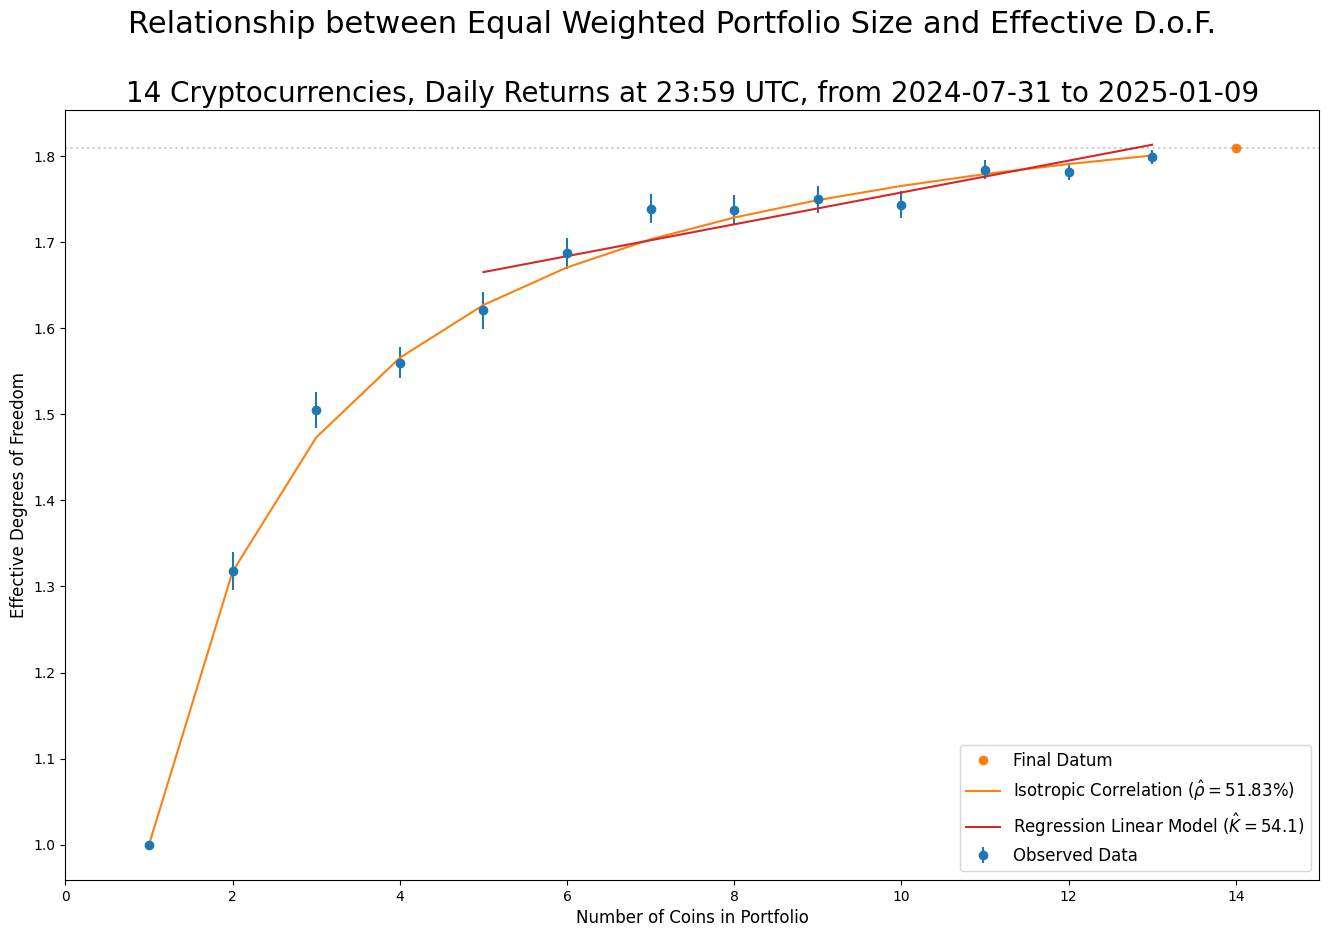

In [9]:
from scipy.stats import chi2,f as fdensity
meta=pd.DataFrame()
meta["Mean"]=(g:=results[(results["Assets"]<=Nmax)][["Assets","Effective D.o.F."]].groupby("Assets")).mean()
meta["St.Dev."]=g.std()
meta["Sample"]=g.count()
meta["Std.Err."]=meta["St.Dev."]/meta["Sample"]**0.5
meta[(l:="Isotropic","Model")]=(x:=meta.index)/(one+(x-one)*rho)
meta[(l,"Error")]=meta["Mean"]-meta[(l,"Model")]
meta[(l,"Z Score")]=meta[(l,"Error")]/meta["Std.Err."]
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc21:=meta[(l,"Chi Sq.")].sum(),df1:=meta[(l,'Chi Sq.')].count(),chi2(df1).sf(sc21)))
meta[(l:="Factor","Model")]=list(map(lambda x:model.params.iloc[0]+model.params.iloc[1]*x if x>=Nmin and x<=Nmax else np.nan,meta.index))
meta[(l,"Error")]=meta["Mean"]-meta[(l,"Model")]
meta[(l,"Z Score")]=meta[(l,"Error")]/meta["Std.Err."]
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc22:=meta[(l,"Chi Sq.")].sum(),df2:=meta[(l,'Chi Sq.')].count()-len(model.params),chi2(df2).sf(sc22)))
meta.columns=pd.MultiIndex.from_tuples(list(map(lambda x:x if type(x)==tuple else (x,''),meta.columns)))
display(meta)

nprint("F Test for Equivalence of Descriptions: F(%d,%d) = %g, p Value = %g." % (df2,df1,(f:=(sc22/df2)/(sc21/df1)),two*min([fdensity(df2,df1).sf(f),fdensity(df2,df1).cdf(f)])))

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.errorbar(x=meta.index,y=meta["Mean"],yerr=meta["Std.Err."],fmt='o',label='Observed Data')
plot.plot([Nact],[Nstar],'o',label='Final Datum',color='C1')
plot.plot(x,z:=meta[("Isotropic","Model")],'-',label='Isotropic Correlation ($\\hat{\\rho} = %.2f$%%)' % (rho*hundred),color='C1')
plot.plot(xp:=np.arange(Nmin,Nmax+one),model.params.iloc[0]+model.params.iloc[1]*xp,'-',label="Regression Linear Model ($\\hat{K} = %.1f$)" % Kreg,color='C3')
plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title,fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(filepath+title+" 2"+filetype,dpi=300,bbox_inches='tight')

14:59:17 Isotropic Model: Total Chi Squared 11.2807 for 12 d.o.f., p Value = 0.505025.
14:59:17 Fitted linear factor model curve via NLLS: b2bar = 1.05131e-18 ± 0.208062, bbar2 = 8.10981 ± 2.16851e+07, s2bar = 18.0986 ± 4.83944e+07. K* = 1.29634e-19
14:59:17 Factor Model: Total Chi Squared 713.401 for 9 d.o.f., p Value = 9.09353e-148.


Sample                           Isotropic                      \
            Mean   St.Dev. Count  Std.Err.     Model     Error   Z Score   
Assets                                                                     
1.0     1.000000  0.000000    14  0.000000  1.000000  0.000000       NaN   
2.0     1.318208  0.145448    44  0.021927  1.317224  0.000984  0.044878   
3.0     1.504400  0.170972    67  0.020888  1.472979  0.031421  1.504277   
4.0     1.559657  0.159187    79  0.017910  1.565538 -0.005881 -0.328346   
5.0     1.620891  0.180244    71  0.021391  1.626875 -0.005984 -0.279731   
6.0     1.686823  0.172577    89  0.018293  1.670508  0.016315  0.891867   
7.0     1.738676  0.151033    83  0.016578  1.703136  0.035540  2.143772   
8.0     1.737661  0.146521    70  0.017513  1.728456  0.009205  0.525623   
9.0     1.749757  0.120030    59  0.015627  1.748675  0.001082  0.069264   
10.0    1.743456  0.121340    59  0.015797  1.765195 -0.021738 -1.376085   
11.0    1.784032  0.086342    62  0.010965  1.778944  0.005088  0.464001   
12.0    1.781273  0.076878    69  0.009255  1.790567 -0.009294 -1.004211   
13.0    1.798933  0.053721    46  0.007921  1.800521 -0.001588 -0.200506   

                    Factor                                   
         Chi Sq.     Model     Error    Z Score     Chi Sq.  
Assets                                                       
1.0          NaN  0.690564  0.309436        NaN         NaN  
2.0     0.002014  1.054751  0.263458  12.015170  144.364303  
3.0     2.262850  1.279714  0.224686  10.756929  115.711519  
4.0     0.107811  1.432477  0.127180   7.101061   50.425064  
5.0     0.078249  1.542992  0.077899   3.641681   13.261839  
6.0     0.795426  1.626656  0.060167   3.289066   10.817957  
7.0     4.595757  1.692195  0.046481   2.803758    7.861058  
8.0     0.276279  1.744922 -0.007262  -0.414661    0.171944  
9.0     0.004798  1.788261 -0.038503  -2.463977    6.071183  
10.0    1.893610  1.824513 -0.081057  -5.131110   26.328286  
11.0    0.215297  1.855286 -0.071253  -6.498022   42.224293  
12.0    1.008439  1.881734 -0.100461 -10.854686  117.824199  
13.0    0.040203  1.904709 -0.105776 -13.354358  178.338881

14:59:18 Wrote meta data to '/content/drive/MyDrive/meta.tex.'
14:59:18 F Test for Equivalence of Descriptions: F(9,12) = 84.3208, p Value = 3.67385e-09.


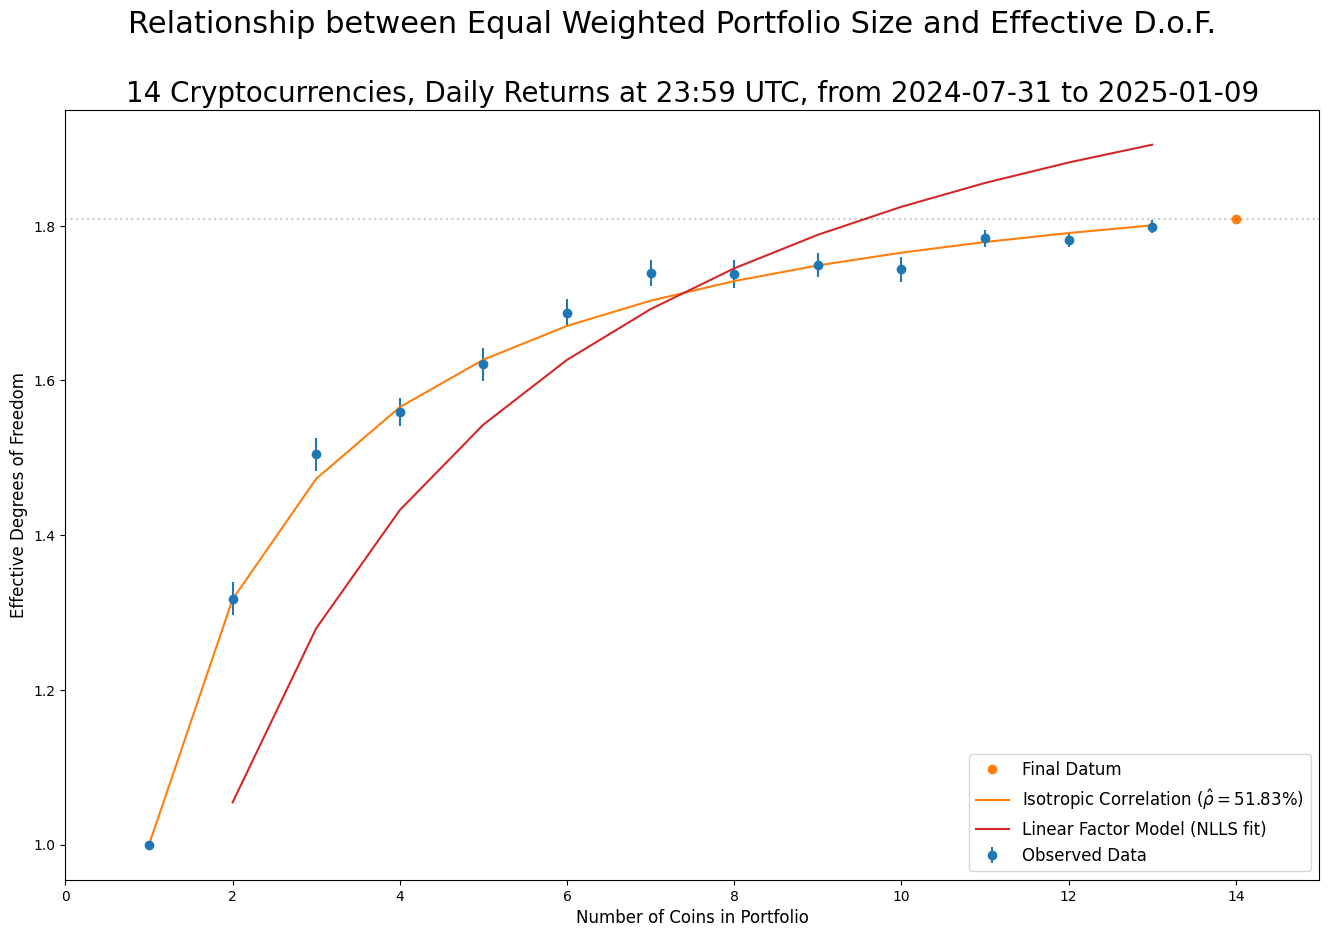

In [10]:
from scipy.stats import chi2,f as fdensity
from scipy.optimize import curve_fit

def nstar(N,*args):
    """Factor model N*(N) function. Parameters are: b2bar, bbar2, s2bar in that order."""
    b2bar,bbar2,s2bar=args
    return N*(b2bar*N+s2bar)/(bbar2*N+s2bar)

meta=pd.DataFrame()
meta[(s:="Sample","Mean")]=(g:=results[(results["Assets"]<=Nmax)][["Assets","Effective D.o.F."]].groupby("Assets")).mean()
meta[(s,"St.Dev.")]=g.std()
meta[(s,"Count")]=g.count()
meta[(s,"Std.Err.")]=meta[(s,"St.Dev.")]/meta[(s,"Count")]**0.5
meta[(l:="Isotropic","Model")]=(x:=meta.index)/(one+(x-one)*rho)
meta[(l,"Error")]=meta[(s,"Mean")]-meta[(l,"Model")]
meta[(l,"Z Score")]=meta[(l,"Error")]/meta[(s,"Std.Err.")]
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
meta.columns=pd.MultiIndex.from_tuples(list(map(lambda x:x if type(x)==tuple else (x,''),meta.columns)))
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc21:=meta[(l,"Chi Sq.")].sum(),df1:=meta[(l,'Chi Sq.')].count(),chi2(df1).sf(sc21)))

theta,vee=curve_fit(nstar,xf:=meta.index[1:],meta.loc[xf,(s,"Mean")],p0=(one,one,one/hundred),bounds=(zero,np.inf))
sigmas=np.sqrt(np.diag(vee))
nprint("Fitted linear factor model curve via NLLS: b2bar = %g ± %g, bbar2 = %g ± %g, s2bar = %g ± %g. K* = %g" % (theta[0],sigmas[0],theta[1],sigmas[1],theta[2],sigmas[2],theta[0]/theta[1]))
meta[(l:="Factor","Model")]=list(map(lambda q:nstar(q,*theta),meta.index))
meta[(l,"Error")]=meta[(s,"Mean")]-meta[(l,"Model")]
meta[(l,"Z Score")]=(meta[(l,"Error")]/meta[(s,"Std.Err.")]).replace(np.inf,np.nan)
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc22:=meta[(l,"Chi Sq.")].sum(),df2:=meta[(l,'Chi Sq.')].count()-len(theta),chi2(df2).sf(sc22)))

display(meta)
meta.replace(np.nan,"").style.format(precision=3).to_latex(latexfile:=filepath+'meta.tex')
nprint("Wrote meta data to '%s.'" % latexfile)

nprint("F Test for Equivalence of Descriptions: F(%d,%d) = %g, p Value = %g." % (df2,df1,(f:=(sc22/df2)/(sc21/df1)),two*min([fdensity(df2,df1).sf(f),fdensity(df2,df1).cdf(f)])))

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.errorbar(x=meta.index,y=meta[(s,"Mean")],yerr=meta[(s,"Std.Err.")],fmt='o',label='Observed Data')
plot.plot([Nact],[Nstar],'o',label='Final Datum',color='C1')
plot.plot(x,z:=meta[("Isotropic","Model")],'-',label='Isotropic Correlation ($\\hat{\\rho} = %.2f$%%)' % (rho*hundred),color='C1')
plot.plot(xf,zf:=list(map(lambda q:nstar(q,*theta),xf)),'-',label="Linear Factor Model (NLLS fit)",color='C3')
plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title,fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(filepath+title+" 3"+filetype,dpi=300,bbox_inches='tight')

In [16]:
from datetime import timedelta
history,returns=download(list(data)).xs('Close',axis=1,level=0),pd.DataFrame()

for c in history:
    if history[c].last_valid_index()!=history.last_valid_index(): # get rid of tickers that have gone stale (this is COIN as returned by Yahoo)
        history.drop(columns=c,inplace=True)

    else:
        returns[c]=history[c].pct_change(fill_method=None)*hundred
        returns.loc[(f:=returns[c].first_valid_index()):(f+timedelta(days=365)),c]=np.nan # set first year of data to NA to avoid launch spikes

returns.index=pd.DatetimeIndex(returns.index).to_period('D')
returns.dropna(inplace=True,how='all')
returns.drop(returns.index[-1],inplace=True) # remove the final row in case it is not complete
returns=returns[[c for c in returns if c not in (vetoes:=['SHIB-USD','PEPE-USD','UNI-USD'])]].copy() # dropping SHIB,PEPE (very low values, precision issue) and UNI (step change in 2022 by orders of magnitude)
nprint("Removed %s entirely!" % ", ".join(vetoes))
returns=returns.copy()
returns['Count']=returns.count(axis=1)
returns=returns[returns['Count']>=five]
returns["Portfolio"]=returns.mean(axis=1)
returns["Year"]=returns.index.year
display(returns)

[*********************100%***********************]  14 of 14 completed


15:00:46 Removed SHIB-USD, PEPE-USD, UNI-USD entirely!


,AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,XLM-USD,XTZ-USD,Count,Portfolio,Year
Date,,,,,,,,,,,,,,
2018-11-11,NaN,NaN,-4.161377,0.031982,-3.744292,-2.096713,-0.561329,-2.208038,-1.978748,4.737204,0.642718,9,-0.033859,2018
2018-11-12,NaN,NaN,-3.193828,-0.623901,-3.099306,-0.742514,-0.436262,10.431562,-1.395306,-2.294911,-3.804309,9,0.384122,2018
2018-11-13,NaN,NaN,-0.754790,-0.184889,-3.883811,-1.225531,-1.707076,3.312554,-1.878841,-3.568305,-1.776871,9,-0.266756,2018
2018-11-14,NaN,NaN,-14.266303,-9.767137,-8.488966,-12.485053,-12.294876,-5.778568,-12.245908,-9.598618,-10.177453,9,-8.610288,2018
2018-11-15,NaN,NaN,-4.094623,-1.573977,3.896099,-2.833865,-0.325807,-1.133531,0.773886,3.819467,-0.530559,9,0.699709,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-05,-2.774838,0.932888,-1.684113,0.080148,-3.086291,-0.946352,-0.645296,0.092632,3.866444,-2.225762,1.964490,11,0.547829,2025
2025-01-06,-0.261109,2.363507,2.500372,3.827622,1.409967,1.915860,1.499890,0.780944,-1.260194,1.165218,0.019225,11,2.080109,2025
2025-01-07,-10.013078,-10.955458,-9.366521,-5.050431,-10.186695,-9.476245,-8.323835,-10.180294,-9.799731,-6.230696,-9.493305,11,-7.339691,2025


In [18]:
results=pd.DataFrame({"Sample":range(1,(n:=5000)+1),"Assets":[np.nan]*n,"Portfolio":[np.nan]*n,"Coins":[""]*n,"Period":[np.nan]*n}).set_index("Sample") # n is number of trials
nprint("Beginning analysis for {:,d} trials.".format(n))

for i in tqdm(results.index): # for each trial, pick a random sample of stocks with portfolio sizes uniformly distributed between 1 and maximum, one of 2^Nmax-1 choices
    period=generator.choice(returns[p:="Year"].unique(),1)[0]
    subset=returns[returns[p]==period][generator.choice(a:=[c for c in returns.columns if '-' in c],generator.integers(1,len(a)+1),replace=False)].copy()
    subset.dropna(inplace=True)
    results.loc[i,"Coins"]=",".join(sorted(map(lambda x:x.split('-')[0],subset.columns))) # list of coins in portfolio
    subset['Portfolio']=subset.mean(axis=1) # equal weighted portfolio return
    results.loc[i,"Assets"]=subset.shape[1]-1 # number of assets we ended up with
    results.loc[i,"Independent"]=subset[[c for c in subset if '-' in c]].var().sum()/results.loc[i,"Assets"]**2 # if no correlation, portfolio variance is total variance divided by square of number of assets
    results.loc[i,"Portfolio"]=subset['Portfolio'].var() # variance of portfolio returns for same period as individual returns
    results.loc[i,"Period"]=period

results.dropna(inplace=True)
results.drop_duplicates(inplace=True)
results["Effective D.o.F."]=results["Independent"]/results["Portfolio"]*results["Assets"]
display(results)
nprint("Done.")

15:00:48 Beginning analysis for 5,000 trials.


  0%|          | 0/5000 [00:00<?, ?it/s]

,Assets,Portfolio,Coins,Period,Independent,Effective D.o.F.
Sample,,,,,,
4,5.0,20.077800,"AVAX,BTC,ETC,ETH,LINK",2022.0,5.095088,1.268836
6,8.0,12.996425,"AAVE,AVAX,BTC,DOGE,ETC,ETH,XLM,XTZ",2024.0,2.722652,1.675939
7,11.0,13.966500,"AAVE,AVAX,BCH,BTC,DOGE,ETC,ETH,LINK,LTC,XLM,XTZ",2021.0,2.154150,1.696606
8,7.0,17.375044,"AVAX,BCH,BTC,ETC,ETH,LINK,LTC",2025.0,2.939103,1.184096
10,4.0,16.341560,"AAVE,BCH,DOGE,XLM",2024.0,7.126350,1.744350
...,...,...,...,...,...,...
4994,5.0,8.868237,"AVAX,BCH,LTC,XLM,XTZ",2023.0,3.133834,1.766887
4995,2.0,29.873839,"AVAX,ETC",2022.0,17.342882,1.161075
4996,6.0,7.816453,"AAVE,BCH,BTC,LINK,LTC,XLM",2023.0,2.306045,1.770147


15:01:27 Done.


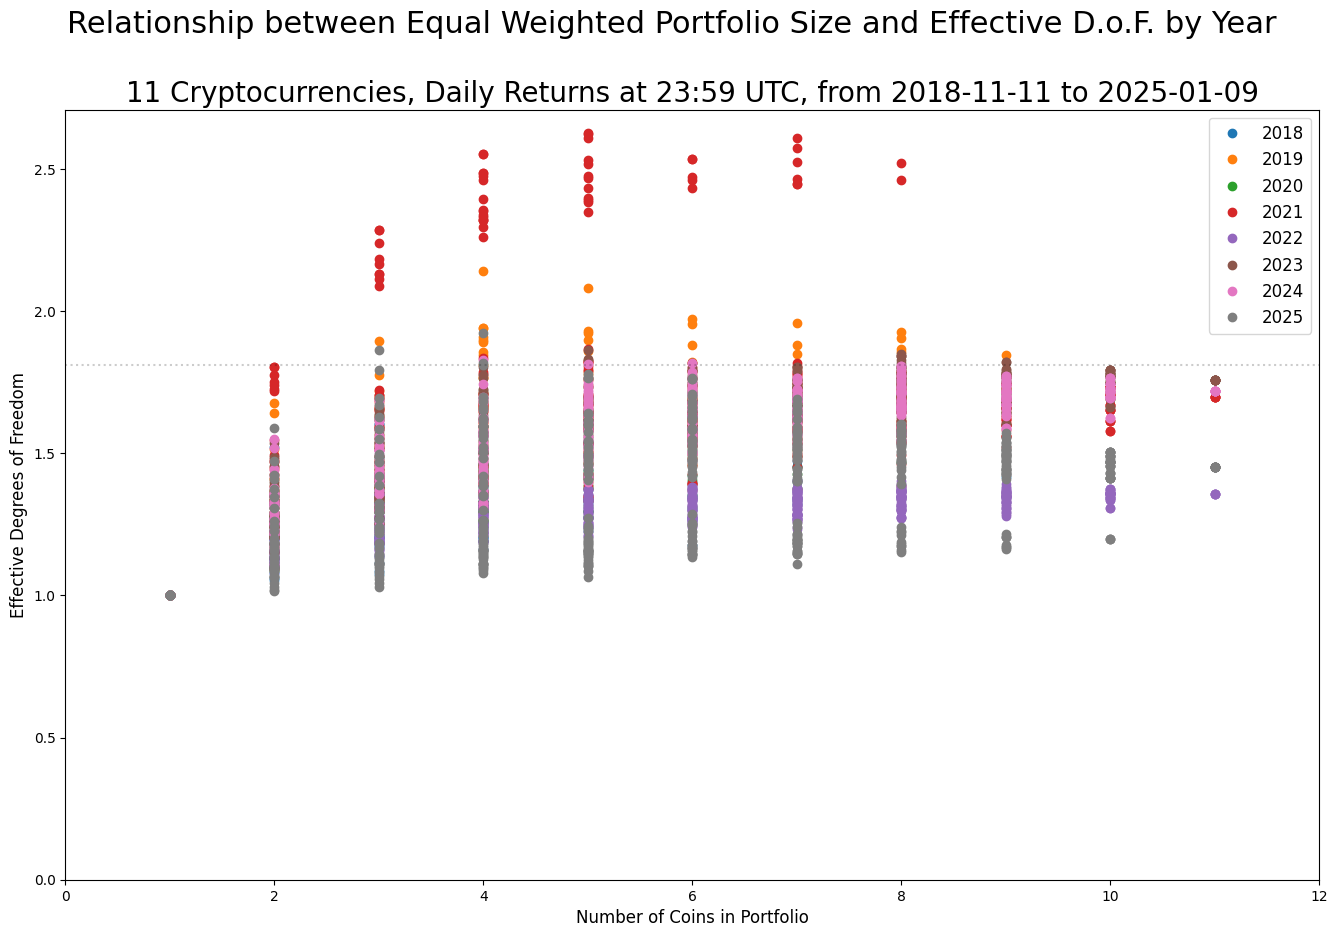

In [19]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
Nmax=results["Assets"].max()-one

for period in sorted(results["Period"].unique()):
    plot.plot(x:=results[select:=results["Period"]==period]["Assets"].to_numpy(),y:=results[select]["Effective D.o.F."].to_numpy(),'o',label=int(period))

plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_ylim(zero,None)
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title:="Relationship between Equal Weighted Portfolio Size and Effective D.o.F. by Year",fontsize=22)
plot.set_title(subtitle:="%d Cryptocurrencies, Daily Returns at 23:59 UTC, from %s to %s" % (len(a),returns.index[0],returns.index[-1]),fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(filepath+title+filetype,dpi=300,bbox_inches='tight')

,AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,XLM-USD,XTZ-USD,Portfolio,Assets,Independent,Effective D.o.F.,Imputed Correlation
Year,,,,,,,,,,,,,,,,
2018,NaN,NaN,138.100860,25.599532,22.740650,50.768403,48.368609,69.624589,39.790087,41.815496,50.243165,30.908678,9,6.012980,1.750862,51.754075
2019,NaN,NaN,28.684996,12.690500,11.798156,19.125543,16.915673,48.141735,23.726669,18.438624,33.475413,10.387239,9,2.629596,2.278408,36.876586
2020,NaN,NaN,29.951167,14.219099,28.864247,27.412591,24.391541,44.235523,26.028220,37.074306,35.577777,16.649036,9,3.305611,1.786920,50.457486
2021,26.338886,64.152351,48.766624,17.715785,486.126192,65.957318,31.357507,53.562107,37.260494,54.787837,60.438949,31.808283,11,7.822017,2.705025,30.665066
2022,40.176555,32.575116,19.110765,11.061469,31.665288,36.796413,20.448674,26.495531,20.252314,16.127458,23.118447,15.636538,11,2.296099,1.615261,58.100438
2023,14.929209,19.360389,17.632938,5.247752,10.643087,11.242495,5.976481,14.988606,11.610572,18.608535,11.133410,6.137769,11,1.168376,2.093942,42.532485
2024,27.377064,24.396001,27.763433,7.856515,29.002709,18.385281,11.606438,22.636858,15.641404,29.878391,25.747313,10.667420,11,1.985879,2.047794,43.716352
2025,24.318353,32.008297,16.663415,7.584345,42.981273,20.561586,14.363375,31.353292,21.481726,106.967630,22.115424,17.902036,11,2.813213,1.728593,53.635561


15:02:10 Wrote variances to '/content/drive/MyDrive/variances.tex.'


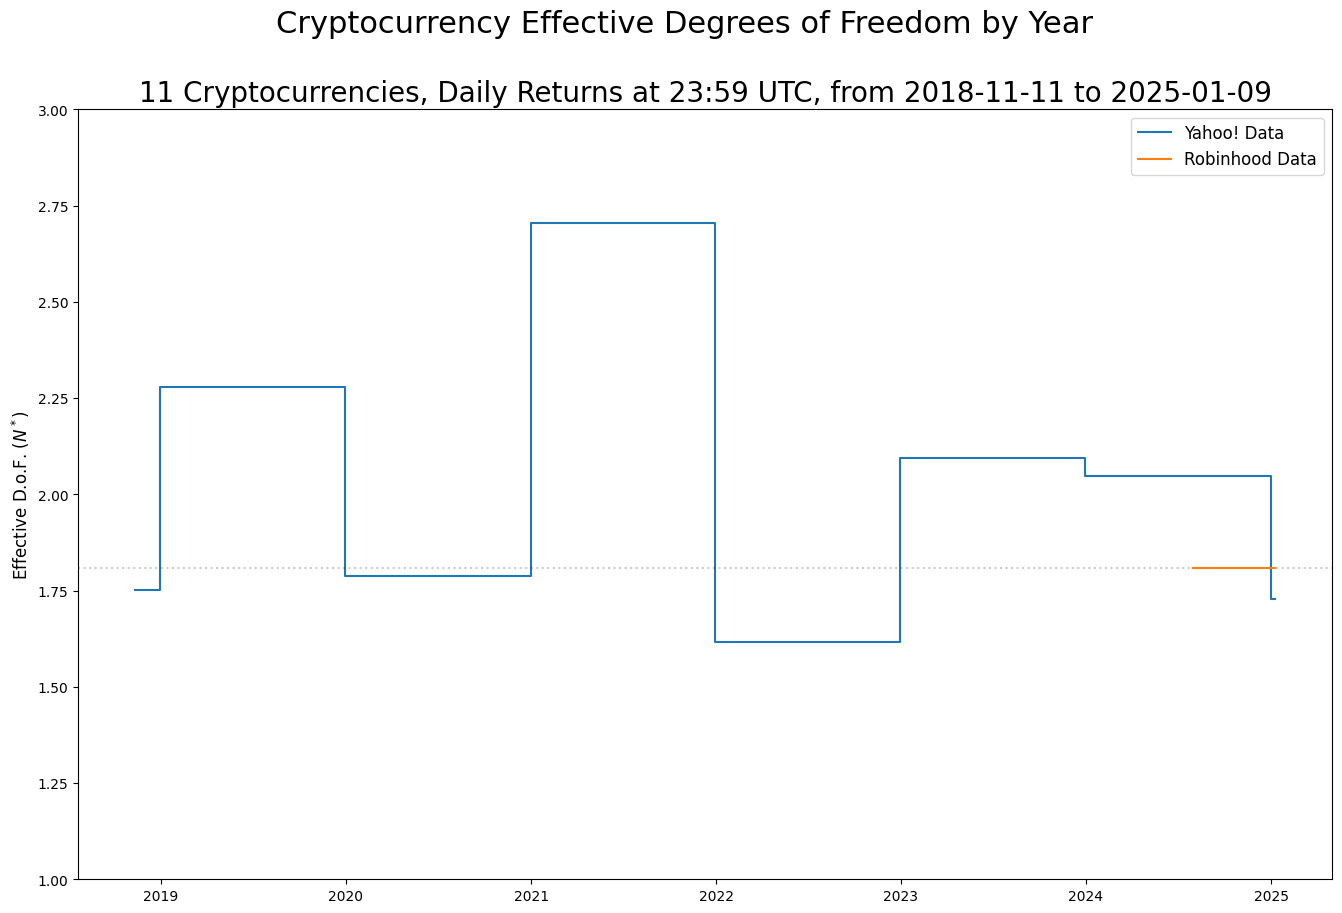

In [21]:
variances=returns[[c for c in returns if '-' in c or c in ('Portfolio','Year')]].groupby('Year').var()
variances["Assets"]=variances.count(axis=1)-1
variances["Independent"]=variances[[c for c in variances if '-' in c]].sum(axis=1)/variances["Assets"]**2
variances[ns:="Effective D.o.F."]=variances["Independent"]/variances["Portfolio"]*variances[na:="Assets"]
variances[nr:="Imputed Correlation"]=(variances[na]-variances[ns])/((variances[na]-one)*variances[ns])*hundred
display(variances)
variances.replace(np.nan,"").T.style.format(precision=2).to_latex(latexfile:=filepath+'variances.tex')
nprint("Wrote variances to '%s.'" % latexfile)

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.step(x:=list(map(lambda x:pd.to_datetime(str(x)),[returns.index[0]]+list(map(lambda x:pd.Period(datetime(x,12,31),'D') if x<data.index[-1].year else data.index[-1],variances.index)))),
          y:=np.insert(variances[ns].to_numpy(),0,variances[ns].iloc[0]),'-',where='pre',label='Yahoo! Data') # the code to make x here is heinous, and that is due to Pandas
plot.set_ylabel("Effective D.o.F. ($N^*$)",fontsize=12)
plot.set_ylim(one,three)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.plot(x:=data.index[[0,-1]],y:=[Nstar]*len(x),'-',color='C1',label='Robinhood Data')
plot.legend(fontsize=12)
figure.suptitle(title:="Cryptocurrency Effective Degrees of Freedom by Year",fontsize=22)
plot.set_title(subtitle,fontsize=20)
figure.savefig(filepath+title+filetype,dpi=300,bbox_inches='tight')